**VIDEO GAME RECOMMENDER SYSTEM WITH NEURAL NETWORKS**

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
game_reviews = pd.read_csv('ratings.csv', sep=',')

In [13]:
print (game_reviews.shape)

(29826315, 3)


The dataset comprises **29.826.314** video game ownerships.

In [14]:
game_reviews.head()

,id,rate,appid
0,76561197960265729,1.0,10
1,76561197960265729,1.0,20
2,76561197960265729,1.0,30
3,76561197960265729,1.0,40
4,76561197960265729,1.0,50


In [15]:
game_reviews["rate"].describe()

count    2.982632e+07
mean     1.307054e+00
std      8.556772e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.100000e+00
max      5.950000e+00
Name: rate, dtype: float64

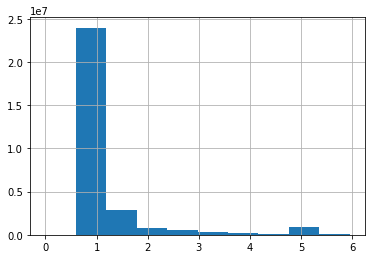

In [16]:
game_reviews["rate"].hist(bins=10)